In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import os

In [2]:
# 决策树保存路径
model_path = '../../../../Model/'
model_name = "tree_acc.pkl"

In [3]:
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
dataset.columns


Index(['亚类', '土属', '土种', '土类', 'DEM', 'TWI5', 'TPI201', 'TPI101', 'TPI11',
       'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH', 'NDVI', 'CUR', 'ASP',
       'PLCUR', 'POCUR', 'LON', 'LAT', 'PH', 'DL', 'SC', 'SC2', 'OSJL', 'SOM',
       'DZ'],
      dtype='object')

In [4]:
dataset["SC2_label"] = dataset.SC2.astype("category").cat.codes
dataset["DL_label"] = dataset.DL.astype("category").cat.codes
dataset["DZ_label"] = dataset.DZ.astype("category").cat.codes
dataset["TL_label"] = dataset.土类.astype("category").cat.codes


In [5]:
result = dataset.groupby('TL_label')["土类"].apply(lambda x: list(x.unique())).to_dict()
result

{0: ['水稻土'], 1: ['石灰土'], 2: ['紫色土'], 3: ['黄壤'], 4: ['黄棕壤']}

In [6]:
features = ['DEM', 'TWI5', 'TPI201', 'TMP','SLOP', 'PRE', 'NIGTH', 'NDVI','PH', 'SOM', 'SC2_label', 'DL_label', 'DZ_label']
target = "TL_label"

In [7]:
X = dataset[features]
y = dataset[target]
# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 通过网格搜索找到最优超参数
params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [9]:

random_state = 42
tree_classifier = DecisionTreeClassifier(random_state=42,**grid_tree.best_params_)
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
# 保存模型
with open(os.path.join(model_path,model_name), 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# 加载模型
with open(os.path.join(model_path,model_name), 'rb') as f:
    predictor = pickle.load(f)

In [11]:
# 查看准确率
y_test_pred= predictor.predict(Xtest)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

0.9103903243540407 0.9054945054945055


In [12]:
# 预测散点图


In [13]:
# 剪枝

In [14]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names=["hzr", "SHT","ZST","HR","HZR"])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

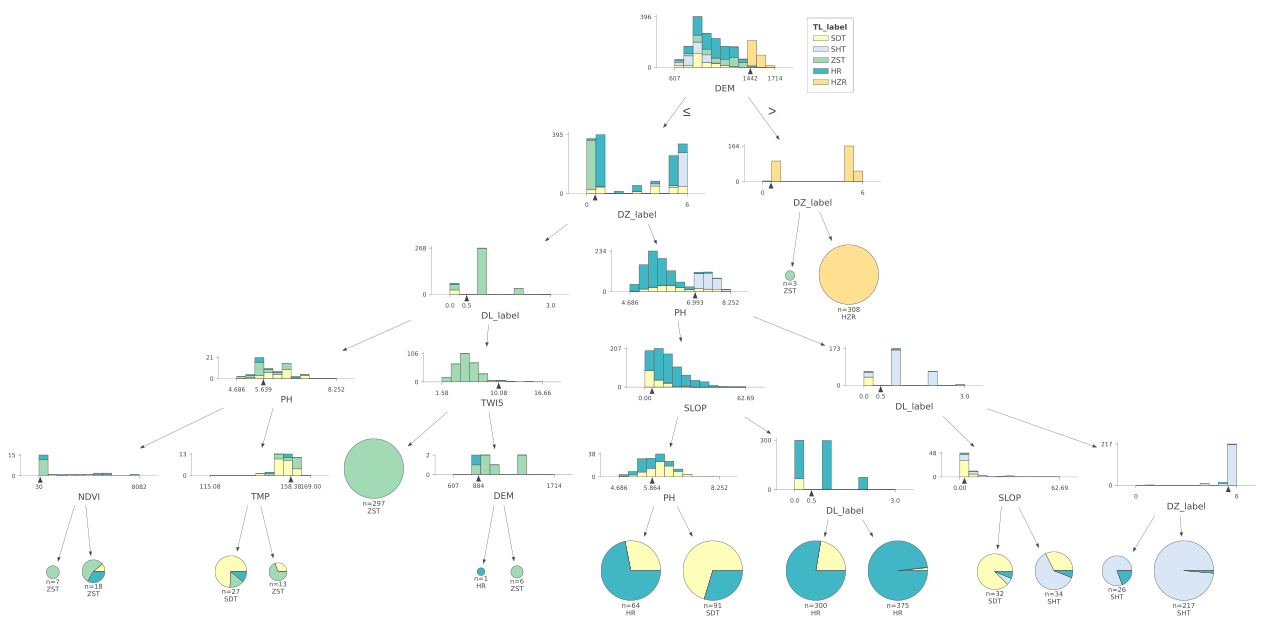

In [16]:
viz_model.view()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

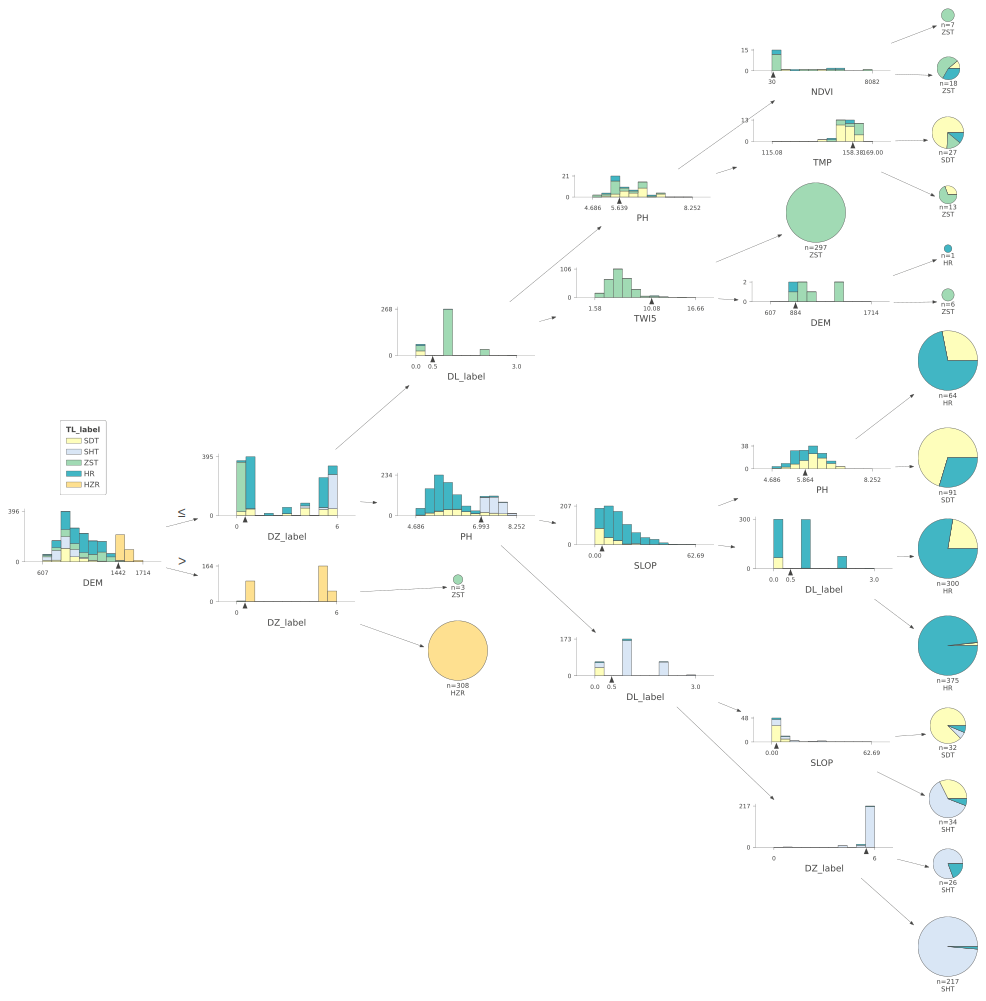

In [17]:
viz_model.view(orientation="LR")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

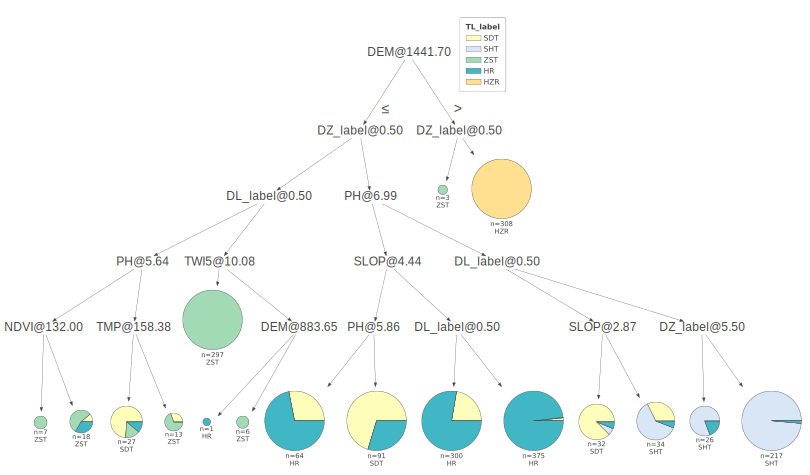

In [18]:
viz_model.view(fancy=False)

In [ ]:
# hzr
dataset = pd.read_csv('../../../data/csv_file/feature_table_result.csv')
dataset.dropna(inplace=True)
hzr_data = dataset[dataset['土类'] == "水稻土"]
hzr_data["SC2_label"] = hzr_data.SC2.astype("category").cat.codes
hzr_data["DL_label"] = hzr_data.DL.astype("category").cat.codes
hzr_data["DZ_label"] = hzr_data.DZ.astype("category").cat.codes
hzr_data["TL_label"] = hzr_data.土类.astype("category").cat.codes
hzr_data["YL_label"] = hzr_data.亚类.astype("category").cat.codes
hzr_data["TS_label"] = hzr_data.土属.astype("category").cat.codes
hzr_data["TZ_label"] = hzr_data.土种.astype("category").cat.codes
hzr_target = 'TZ_label'
hzrX = hzr_data[features]
hzry = hzr_data[hzr_target]
hzrX_train, hzrX_test, hzry_train, hzry_test = train_test_split(hzrX, hzry, test_size=0.2, random_state=52)

In [54]:
hzr_result = hzr_data.groupby('TZ_label')["土种"].apply(lambda x: list(x.unique())).to_dict()

In [ ]:
# 通过网格搜索找到最优超参数
hzr_params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100))} 
hzr_grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
hzr_grid_tree.fit(hzrX_train, hzry_train)
print(hzr_grid_tree.best_params_)

In [55]:

hzr_tree_classifier = DecisionTreeClassifier(random_state=42,**hzr_grid_tree.best_params_)
hzr_tree_classifier.fit(hzrX_train, hzry_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [56]:
# 查看准确率
hzr_y_test_pred= hzr_tree_classifier.predict(hzrX_test)
hzr_y_train_pred = hzr_tree_classifier.predict(hzrX_train)
accuracy_test = accuracy_score(hzry_test,hzr_y_test_pred)
accuracy_train = accuracy_score(hzry_train,hzr_y_train_pred)
print(accuracy_train,accuracy_test)

0.5164319248826291 0.37037037037037035


In [ ]:
# 画图
sdt_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names=["hzr", "SHT","ZST","HR","HZR"])
sdt_model.view()
sdt_model.view(orientation="LR")
sdt_model.view(fancy=False)